# Отбор признаков

In [1]:
import warnings
warnings.filterwarnings('ignore');

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

Зачем избавляться от лишних признаков?

<ol>
    <li> Чем больше данных, тем выше вычислительная сложность. Пока мы балуемся с игрушечными датасетами, размер данных – это не проблема, а для реального нагруженного продакшена лишние сотни признаков могут быть ощутимы. 
    <li> Некоторые алгоритмы принимают шум (неинформативные признаки) за сигнал, переобучаясь.
</ol>

# Статистические подходы

## Удаление низковариативных признаков

Очевидно, что признак, принимающий на всей выборке одно и то же значение, бесполезен: он не несет никакой информативности. 

In [3]:
from sklearn.feature_selection import VarianceThreshold

In [4]:
from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification()

In [5]:
x_data_generated.shape

(100, 20)

In [6]:
VarianceThreshold(.94).fit_transform(x_data_generated).shape

(100, 14)

In [7]:
VarianceThreshold(.8).fit_transform(x_data_generated).shape

(100, 19)

In [8]:
VarianceThreshold(.7).fit_transform(x_data_generated).shape

(100, 19)

## Статистические тесты

In [9]:
from sklearn.feature_selection import SelectKBest

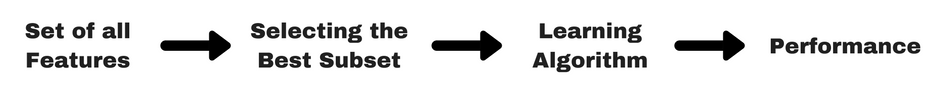

In [10]:
Image("../images/fs_filter.png")

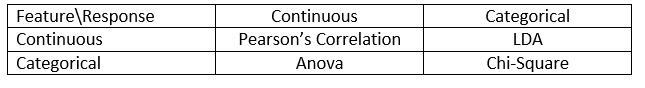

In [11]:
Image("../images/filter_tests.png")

* __Корреляция Пирсона__: измеряет линейную зависимость между двумя непрерывными числовыми признаками $X$ и $Y$ и принимает значения в интервале $[-1; 1]$. 
    * Для использования в __sklearn__ у любого dataframe уже есть метод `.corr()`.
    * Вычисляется по формуле:
    
$$ \rho_{X,Y} = \frac{E[(X - \mu_X)(Y - \mu_Y)]}{\sigma_X \sigma_Y} $$

$\quad\quad\quad$, где $ \mu $ - среднее, а $ \sigma $ - среднеквадратичное отклонение.
    
    
    
* __LDA__: линейный дискриминантный анализ (англ. _linear discriminant analysis_) используется, чтобы найти линейную комбинацию признаков, описывающих или разделяющих 2 или более уровней категориальной переменной.
    

* __ANOVA__: расшифровывается как "анализ дисперсии" (англ *__AN__alysis __O__f __VA__riance*). Метод схож с LDA за исключением того факта, что ANOVA оперирует одним или более категорийным признаком и одним зависимым непрерывным числовым признаком. Метод предоставляет статистический тест равенства средних в разных группах.
    * Как статистический тест в __sklearn__ импортируется следующим образом:
    ```python
    from sklearn.feature_selection import f_classif
    ```

* __$\chi^2$__: произносится как _"хи-квадрат"_. Статистический тест, применимый к группе категорийных признаков для вычисления правдоподобия корреляции (или ассоциации) между ними с использованием их частотного распределения.
    * Как статистический тест в __sklearn__ импортируется следующим образом:
    ```python
    from sklearn.feature_selection import chi2
    ```

--- 
    
Вне этой таблицы, но в __sklearn__ есть еще несколько тестов:

* __F-value__: работает в два шага. На первом высчитывается корреляция Пирсона по формуле выше. После чего полученное значение преобразуется к F score, а потом к p-value (см. https://en.wikipedia.org/wiki/F-test , раздел `Regression problems`)
    * Как статистический тест в __sklearn__ импортируется следующим образом:
    ```python
    from sklearn.feature_selection import f_regression
    ```
    
* __Взаимная информация__: вычисляет объем [взаимной информации](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F), то есть 0 будет свидетельствовать о независимости двух случайных переменных, а увеличение данной величины - о большем количестве информации (шеннонов или битов), получаемое об одной из них от значения другой.
    * Как статистический тест в __sklearn__ импортируется следующим образом:
    ```python
    from sklearn.feature_selection import mutual_info_classif # для задач классификации
    from sklearn.feature_selection import mutual_info_regression # для задач регрессии
    ```

Называются фильтрацией или фильтр-методами

In [12]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [13]:
skb = SelectKBest(mutual_info_classif, k=10)

In [14]:
x_data_generated.shape

(100, 20)

In [15]:
x_new = skb.fit_transform(x_data_generated, y_data_generated)

In [16]:
x_new.shape

(100, 10)

# Wrapper methods

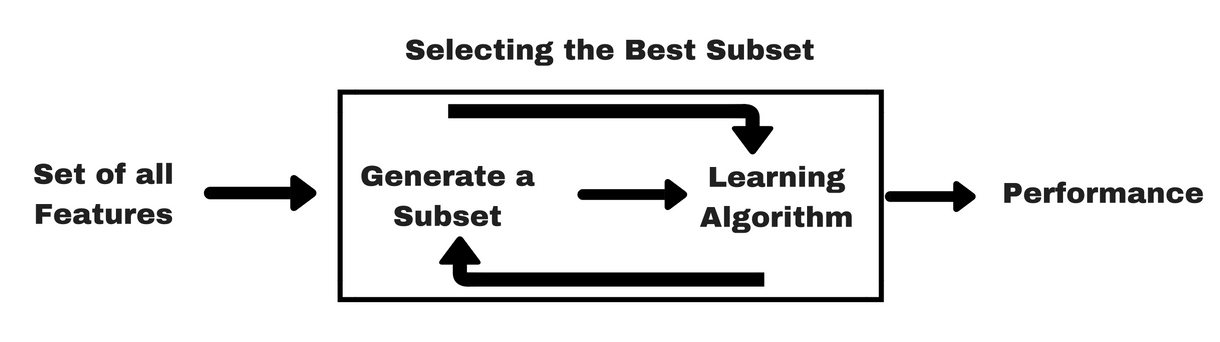

In [17]:
Image("../images/fs_wrapper.png")

__RFE__ - Recursive Feature Elimination, или рекурсивное уничтожение признаков.

Построено на идее постоянного построения некоторой модели и выбора наиболее значимого или бесполезного признака (например, по коэффициентам линейной регрессии), отбрасывании этого признака и повторении такого процесса с остальными признаками до тех пор, пока признаки не закончатся.

После чего признаки ранжируются по количеству "раундов", которые они продержались, - считай, по полезности, информативности, важности.

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.datasets import load_boston

In [20]:
boston = load_boston()
X = boston["data"]
y = boston["target"]
names = boston["feature_names"]

In [21]:
lr = LinearRegression()

In [22]:
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,y);

In [23]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'NOX'), (2, 'RM'), (3, 'CHAS'), (4, 'PTRATIO'), (5, 'DIS'), (6, 'LSTAT'), (7, 'RAD'), (8, 'CRIM'), (9, 'INDUS'), (10, 'ZN'), (11, 'TAX'), (12, 'B'), (13, 'AGE')]


# Отбор при помощи моделей

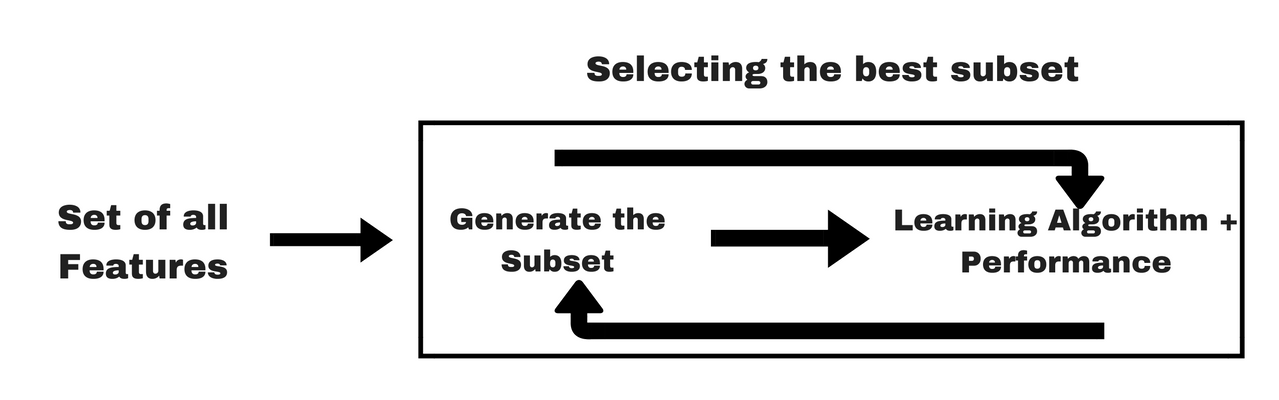

In [24]:
Image("../images/fs_embed.png")

## Lasso

Лассо – это линейная модель с регуляризацией l1. Линейная модель обладает свойством занулять коэфициеты у ненужных признаков.

In [25]:
from sklearn.linear_model import Lasso

In [26]:
from sklearn.datasets import load_boston

In [27]:
bunch = load_boston()

In [28]:
features = bunch.feature_names

In [29]:
X, y = bunch.data, bunch.target

In [30]:
clf = Lasso()
clf.fit(X, y);

In [31]:
clf.coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

In [32]:
print('Всего Lasso выкинуло %s переменных' % (clf.coef_ == 0).sum())

Всего Lasso выкинуло 3 переменных


In [33]:
print('Это признаки:')
for s in features[np.where(clf.coef_ == 0)[0]]:
    print(' * ', s)

Это признаки:
 *  INDUS
 *  CHAS
 *  NOX


## RandomForest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
clf = RandomForestRegressor()
clf.fit(X, y);

Показывает важность признаков в попугаях, но иногда бывает полезно

In [36]:
clf.feature_importances_

array([3.13005674e-02, 1.26171568e-03, 9.17311651e-03, 4.46788979e-04,
       3.06336214e-02, 3.52868287e-01, 1.80743890e-02, 6.69698686e-02,
       2.95245642e-03, 1.59909211e-02, 1.37077636e-02, 9.66404871e-03,
       4.46956455e-01])

In [37]:
imp_feature_idx = clf.feature_importances_.argsort()

In [38]:
imp_feature_idx

array([ 3,  1,  8,  2, 11, 10,  9,  6,  4,  0,  7,  5, 12])

In [39]:
from sklearn.metrics import r2_score

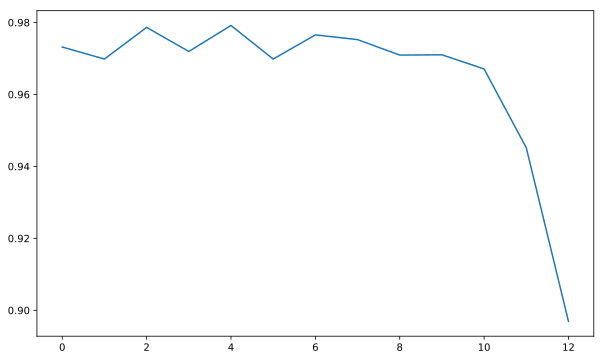

In [40]:
quals = []
for i in range(X.shape[1]):
    clf = RandomForestRegressor()
    clf.fit(X[:, imp_feature_idx[i:]], y)
    q = r2_score(y, clf.predict(X[:, imp_feature_idx[i:]]))
    quals.append(q)
plt.figure(figsize=(10, 6));
plt.plot(quals);

In [41]:
max(quals)

0.9791645204399664

# Перебор

## Exhaustive Feature Selector

In [42]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [43]:
efs = ExhaustiveFeatureSelector(
    Lasso(), 
    min_features=1,
    max_features=10,
    scoring='neg_mean_squared_error',
    print_progress=True,
    cv=5
)

In [44]:
efs.fit(X, y);

Features: 8099/8099

In [45]:
print('Best score: %.2f' % -efs.best_score_)
print('Best subset:', efs.best_idx_)

Best score: 33.13
Best subset: (0, 1, 7, 8, 9, 10, 11, 12)


## Sequential Feature Selector

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [47]:
sfs = SequentialFeatureSelector(
    Lasso(), 
    k_features=(1,10),
    scoring='neg_mean_squared_error',
    cv=5
)

In [48]:
sfs.fit(X, y);

In [49]:
-sfs.k_score_

33.17699232325026

In [50]:
sfs.k_feature_idx_

(0, 1, 2, 7, 8, 9, 10, 11, 12)

# Что использовать?

* Методы фильтрации измеряют полезность признака, измеряя его корреляцию с целевой переменной, в то время как методы-обертки измеряют ценность определенного подмножества признаков, тренируя полноценную модель. В том числе это и значит, что будут учтены и взаимодействия признаков.
* Методы фильтрации работают намного быстрее, и на больших датасетах могут оказаться полезнее.
* Выводы в методах фильтрации делаются по статистическим тестам, в модельных методах - по результатам кросс-валидации.
* Модельные методы намного надежнее.
* Взятие меньшего подмножества признаков через модельный отбор защищает от переобучения. Подобного результата фильтрация не гарантирует.